In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow 相關套件
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# if len(physical_devices) > 0:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [95]:
train_df = pd.read_csv('/kaggle/input/aia-xt122-dl-kaggle/Train.csv')
test_df = pd.read_csv('/kaggle/input/aia-xt122-dl-kaggle/Test.csv')

In [96]:
train_df.head() 

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,832ff325-90ce-40e3-8c74-42b679b99e5c,2941,32,4,108,12,3369,219,230,147,...,0,0,0,0,0,0,0,0,0,1
1,6ea6b99e-c247-40d9-87fe-345aab8e87a4,2304,20,19,350,141,1423,203,195,124,...,0,0,0,0,0,0,0,0,0,2
2,d28eb06b-19e6-4951-8845-3c7f1484393e,3397,157,13,458,46,2255,234,241,136,...,0,0,0,0,0,0,1,0,0,6
3,a3730218-b77f-4a97-8e34-2715172c3f31,2276,122,13,470,118,1423,242,229,114,...,0,0,0,0,0,0,0,0,0,3
4,c0374ece-3ad5-40f5-bd58-0dad28a20a64,2780,13,8,124,4,1959,212,223,148,...,0,0,0,0,0,0,0,0,0,4


In [97]:
train_df.drop(columns='Id', inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14364 entries, 0 to 14363
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           14364 non-null  int64
 1   Aspect                              14364 non-null  int64
 2   Slope                               14364 non-null  int64
 3   Horizontal_Distance_To_Hydrology    14364 non-null  int64
 4   Vertical_Distance_To_Hydrology      14364 non-null  int64
 5   Horizontal_Distance_To_Roadways     14364 non-null  int64
 6   Hillshade_9am                       14364 non-null  int64
 7   Hillshade_Noon                      14364 non-null  int64
 8   Hillshade_3pm                       14364 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  14364 non-null  int64
 10  Wilderness_Area1                    14364 non-null  int64
 11  Wilderness_Area2                    14364 non-null  int64
 12  Wild

In [350]:
# features_to_plot = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']

# for cover_type in train_df['Cover_Type'].unique():
#     plt.figure(figsize=(10, 6))
#     for feature in features_to_plot:
#         plt.scatter(
#             train_df[train_df['Cover_Type'] == cover_type][feature], 
#             [cover_type] * len(train_df[train_df['Cover_Type'] == cover_type]), 
#             label=feature
#         )
#     plt.title(f'Scatter Plot of Selected Features for Cover_Type {cover_type}')
#     plt.xlabel('Value')
#     plt.ylabel('Cover_Type')
#     plt.legend()
#     plt.show()

In [7]:
# train_df['Hydro_Distance_Sum'] = train_df['Horizontal_Distance_To_Hydrology'] + train_df['Vertical_Distance_To_Hydrology']
# train_df['Aspect_Slope_Product'] = train_df['Aspect'] * train_df['Slope']
# train_df['Hillshade_Mean'] = (train_df['Hillshade_9am'] + train_df['Hillshade_Noon'] + train_df['Hillshade_3pm']) / 3

# 創建類別特徵的統計特徵
# soil_columns = ['Soil_Type' + str(i) for i in range(1, 41)]
# train_df['Total_Soil_Type_Presence'] = train_df[soil_columns].sum(axis=1)
# train_df['Total_Wilderness_Presence'] = train_df[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].sum(axis=1)


# vegetation_columns = ['Soil_Type' + str(i) for i in range(1, 41)]
# geographic_area_columns = ['Wilderness_Area' + str(i) for i in range(1, 5)]
# # 計算每個植被類型在每個地理區域的佔比
# for geo_col in geographic_area_columns:
#     for veg_col in vegetation_columns:
#         new_feature_name = f'{veg_col}_Percentage_{geo_col}'
#         train_df[new_feature_name] = train_df[veg_col] / (train_df[vegetation_columns].sum(axis=1) + 1) * train_df[geo_col]

# 創建高度和坡度的組合特徵
# train_df['Height_Slope_Ratio'] = train_df['Elevation'] / train_df['Slope']

# 計算光照特徵（9am、Noon、3pm）與地理特徵的乘積
# train_df['Hillshade_9am_Geographic'] = train_df['Hillshade_9am'] * train_df['Aspect']
# train_df['Hillshade_Noon_Geographic'] = train_df['Hillshade_Noon'] * train_df['Aspect']
# train_df['Hillshade_3pm_Geographic'] = train_df['Hillshade_3pm'] * train_df['Aspect']

# 計算水源距離與高度之間的乘積
# train_df['Hydro_Distance_Height_Product'] = train_df['Horizontal_Distance_To_Hydrology'] * train_df['Elevation']

# # 計算光照特徵的變異性（標準差）
# train_df['Hillshade_Variability'] = train_df[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].std(axis=1)

# # 計算坡度和植被類型的組合特徵的平均值
# slope_veg_columns = ['Slope'] + vegetation_columns
# train_df['Slope_Veg_Mean'] = train_df[slope_veg_columns].mean(axis=1)

# # 計算水源距離的平均值與坡度的組合
# train_df['Hydro_Distance_Mean_Slope'] = (train_df['Horizontal_Distance_To_Hydrology'] + train_df['Vertical_Distance_To_Hydrology']) / 2 * train_df['Slope']

# from sklearn.cluster import KMeans

# # 假設您有類似這樣的植被特徵列，以及地理區域列
# vegetation_columns = ['Soil_Type' + str(i) for i in range(1, 41)]
# geographic_area_columns = ['Wilderness_Area' + str(i) for i in range(1, 5)]

# # 設定聚類數量
# num_clusters = 3

# # 使用K-means進行聚類
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# train_df['Geo_Veg_Cluster'] = kmeans.fit_predict(train_df[geographic_area_columns + vegetation_columns])

# print(train_df.shape)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(14364, 68)


In [98]:
# add columns
train_df['Euclidian_Distance_To_Hydrology'] = (train_df['Horizontal_Distance_To_Hydrology']**2 + 
                                                           train_df['Vertical_Distance_To_Hydrology']**2)**0.5
train_df['Mean_Elevation_Vertical_Distance_Hydrology'] = (train_df['Elevation'] + 
                                                                      train_df['Vertical_Distance_To_Hydrology'])/2
train_df['Mean_Distance_Hydrology_Firepoints'] = (train_df['Horizontal_Distance_To_Hydrology'] + 
                                                              train_df['Horizontal_Distance_To_Fire_Points'])/2
train_df['Mean_Distance_Hydrology_Roadways'] = (train_df['Horizontal_Distance_To_Hydrology'] + 
                                                            train_df['Horizontal_Distance_To_Roadways'])/2
train_df['Mean_Distance_Firepoints_Roadways'] = (train_df['Horizontal_Distance_To_Fire_Points'] + 
                                                             train_df['Horizontal_Distance_To_Roadways'])/2

In [99]:
# add sqrt transformed columns to the trees_w_numeric_soil dataframe
for col in train_df.columns:
    if train_df[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            train_df['sqrt' + col] = np.sqrt(train_df[col])

In [100]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

train_df = train_df[(train_df['Horizontal_Distance_To_Fire_Points'] > outlier_function(train_df, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (train_df['Horizontal_Distance_To_Fire_Points'] < outlier_function(train_df, 'Horizontal_Distance_To_Fire_Points')[1])]

In [101]:
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [102]:
# list of columns of wilderness areas and soil types
is_binary_columns = [column for column in train_df.columns if ("Wilderness" in column) | ("Soil" in column)]
pd.unique(train_df[is_binary_columns].values.ravel())

array([1., 0.])

In [103]:
# create a list of soil_type columns
soil_columns = [c for c in train_df.columns if "Soil" in c]
train_df["soil_sum"] = 0

# sum of all soil type columns
for c in soil_columns:
    train_df["soil_sum"] += train_df[c]

print(train_df.soil_sum.value_counts())
train_df.drop(columns=["soil_sum"], inplace=True)

2.0    14238
Name: soil_sum, dtype: int64


In [104]:
reverse_one_hot_encode(train_df, 15, 55, "Soil_Type")

In [105]:
# final list of features
train_df['Wilderness_Area_Type'] = (train_df.iloc[:, 11:15] == 1).idxmax(1)
wilderness_areas = sorted(train_df['Wilderness_Area_Type'].value_counts().index.tolist())
transformed_features = ['sqrtHorizontal_Distance_To_Hydrology', 'sqrtMean_Distance_Hydrology_Roadways', 'sqrtEuclidian_Distance_To_Hydrology', 
                        'Mean_Elevation_Vertical_Distance_Hydrology', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Firepoints',  ]

all_features =  (['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                  'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' ] + wilderness_areas +
                 ['Soil_Type'] + transformed_features + ['Cover_Type'])
train_df = train_df[all_features]

In [106]:
y_df = train_df.Cover_Type.values
train_df.pop('Cover_Type')
X_df = train_df.iloc[:, :].values
# X_test = test_df.iloc[:, :-1].values
# y_test = test_df.Cover_Type.values
print(y_df)


[1 2 6 ... 5 1 4]


In [107]:
print(X_df.shape)

(14238, 18)


In [64]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Feature scaling
sc = StandardScaler()
X_scale = sc.fit_transform(X_df, y_df)
# X_test_scale = sc.transform(X_test)

# Convert to One-Hot encoding
y_onehot = keras.utils.to_categorical(y_df)
# y_test_onehot = keras.utils.to_categorical(y_test)

In [65]:
# train, valid/test dataset split
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_scale, y_onehot,
                                                      test_size=0.2,
                                                      random_state=17,
                                                      stratify=y_df)

print(f'X_train shape: {X_train.shape}')
print(f'X_valid shape: {X_valid.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_valid shape: {y_valid.shape}')

X_train shape: (11390, 18)
X_valid shape: (2848, 18)
y_train shape: (11390, 7)
y_valid shape: (2848, 7)


In [110]:
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import  metrics
from sklearn.model_selection import train_test_split

# model = XGBClassifier(n_estimators=5000,
#                                 learning_rate=0.01,
#                                 max_depth=5,
#                                 random_state=42)

model = ExtraTreesClassifier(n_estimators=500, 
                                           max_features=None, 
                                           min_samples_leaf=1, 
                                           min_samples_split=2,
                                           random_state=42)
# Fit the model
# model.fit(X_train, y_train, early_stopping_rounds=30, 
#              eval_set=[(X_test, y_test)], verbose=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_df, y_df,
                                                      test_size=0.2,
                                                      random_state=17,
                                                      stratify=y_df)
model.fit(X_train, y_train)

ExtraTreesClassifier(max_features=None, n_estimators=500, random_state=42)

In [18]:
# 查看特徵重要性
feature_importances = model.feature_importances_

# 將特徵重要性和特徵名稱組合起來
feature_importance_dict = dict(zip(train_df.columns, feature_importances))

# 按照特徵重要性排序
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# 打印排序後的特徵
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

Elevation: 0.07859817147254944
Wilderness_Area4: 0.07534428685903549
Soil_Type30: 0.0682661309838295
Soil_Type12: 0.06421934813261032
Soil_Type3: 0.05120793357491493
Soil_Type10: 0.044808968901634216
Soil_Type4: 0.04439916834235191
Wilderness_Area1: 0.03704356029629707
Soil_Type22: 0.03675014153122902
Soil_Type13: 0.03441294655203819
Soil_Type39: 0.033705759793519974
Soil_Type2: 0.022352714091539383
Wilderness_Area3: 0.020652106031775475
Soil_Type38: 0.019764643162488937
Soil_Type32: 0.016634073108434677
Hillshade_9am: 0.015505140647292137
Soil_Type35: 0.015246154740452766
Soil_Type23: 0.0145757757127285
Soil_Type5: 0.013763708993792534
Soil_Type17: 0.013351851142942905
Wilderness_Area2: 0.013056615367531776
Soil_Type33: 0.012827826663851738
Hydro_Distance_Height_Product: 0.011542489752173424
Soil_Type20: 0.011434082873165607
Soil_Type40: 0.01129702664911747
Soil_Type6: 0.011158502660691738
Soil_Type1: 0.010481083765625954
Soil_Type24: 0.010455367155373096
Horizontal_Distance_To_Roadwa

In [111]:
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_valid)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_valid, y_test_pred))

rmse_train, rmse_test

(0.0, 0.8980706536105076)

In [ ]:
preds = model.predict(test_data)
output = pd.DataFrame({'Id': ids,
                       'SalePrice': np.expm1(preds.squeeze())})

output.head()

In [90]:
def build_model(input_shape, output_shape):
    keras.backend.clear_session()
    tf.random.set_seed(17)

    model = keras.models.Sequential()
    model.add(layers.Dense(64,
                           input_shape=input_shape,
                           activation='tanh'
                          ))
#     model.add(layers.Dropout(0.1, seed=17))
#     model.add(layers.BatchNormalization())
    model.add(layers.Dense(64,
                           activation='tanh'
                          ))
#     model.add(layers.Dropout(0.1, seed=17))
#     model.add(layers.BatchNormalization())
#     model.add(layers.Dense(64,
#                            activation='tanh'
#                           ))
#     model.add(layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(output_shape,
                                    activation='softmax'))
    return model

In [91]:
model = build_model(X_train[0].shape, y_onehot.shape[1])
model.summary()

# 編譯模型用以訓練 (設定 optimizer, loss function, metrics, 等等)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Nadam(0.001),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 5,831
Trainable params: 5,831
Non-trainable params: 0
_________________________________________________________________


In [92]:
n_patience = 10  # 訓練過程經過 n_patience 次沒有進步之後停止
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',   # 是否進步的指標
    patience=n_patience,
    verbose=1)
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/100
356/356 [==============================] - 3s 4ms/step - loss: 1.0177 - acc: 0.5878 - val_loss: 0.7922 - val_acc: 0.6773
Epoch 2/100
356/356 [==============================] - 1s 3ms/step - loss: 0.7529 - acc: 0.6929 - val_loss: 0.7179 - val_acc: 0.6952
Epoch 3/100
356/356 [==============================] - 1s 3ms/step - loss: 0.6968 - acc: 0.7122 - val_loss: 0.6671 - val_acc: 0.7173
Epoch 4/100
356/356 [==============================] - 1s 3ms/step - loss: 0.6623 - acc: 0.7272 - val_loss: 0.6417 - val_acc: 0.7367
Epoch 5/100
356/356 [==============================] - 1s 3ms/step - loss: 0.6377 - acc: 0.7385 - val_loss: 0.6231 - val_acc: 0.7454
Epoch 6/100
356/356 [==============================] - 1s 3ms/step - loss: 0.6188 - acc: 0.7442 - val_loss: 0.6009 - val_acc: 0.7623
Epoch 7/100
356/356 [==============================] - 1s 4ms/step - loss: 0.6039 - acc: 0.7503 - val_loss: 0.5940 - val_acc: 0.7511
Epoch 8/100
356/356 [==============================] - 1s 3ms/step - 

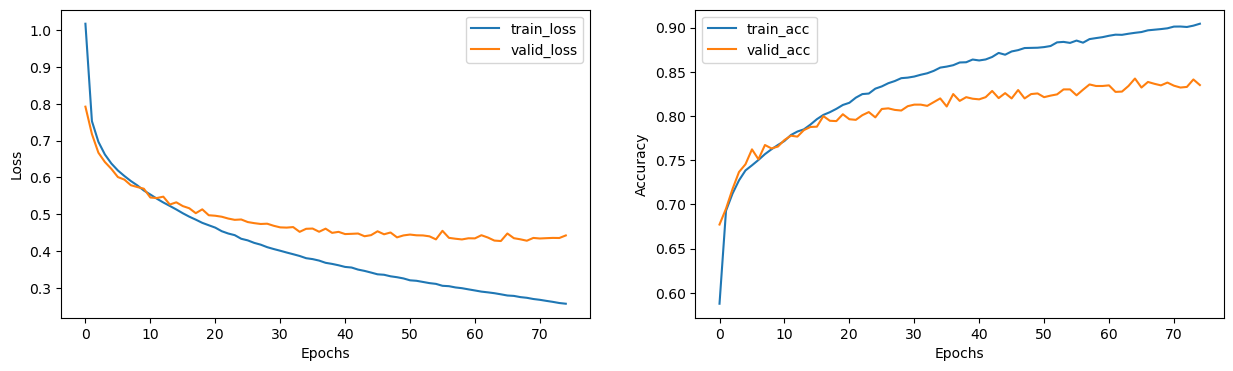

In [93]:
train_loss = history.history['loss']
train_acc = history.history['acc']

valid_loss = history.history['val_loss']
valid_acc = history.history['val_acc']

plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(train_loss)), train_loss, label='train_loss')
plt.plot(range(len(valid_loss)), valid_loss, label='valid_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(train_acc)), train_acc, label='train_acc')
plt.plot(range(len(valid_acc)), valid_acc, label='valid_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [401]:
test_df = pd.read_csv('/kaggle/input/aia-xt122-dl-kaggle/Test.csv')
ids = test_df.pop('Id')

# test_df['Hydro_Distance_Sum'] = test_df['Horizontal_Distance_To_Hydrology'] + test_df['Vertical_Distance_To_Hydrology']
# test_df['Aspect_Slope_Product'] = test_df['Aspect'] * test_df['Slope']
# test_df['Hillshade_Mean'] = (test_df['Hillshade_9am'] + test_df['Hillshade_Noon'] + test_df['Hillshade_3pm']) / 3

# # 創建類別特徵的統計特徵
# soil_columns = ['Soil_Type' + str(i) for i in range(1, 41)]
# test_df['Total_Soil_Type_Presence'] = test_df[soil_columns].sum(axis=1)
# test_df['Total_Wilderness_Presence'] = test_df[['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']].sum(axis=1)


# vegetation_columns = ['Soil_Type' + str(i) for i in range(1, 41)]
# geographic_area_columns = ['Wilderness_Area' + str(i) for i in range(1, 5)]
# # 計算每個植被類型在每個地理區域的佔比
# for geo_col in geographic_area_columns:
#     for veg_col in vegetation_columns:
#         new_feature_name = f'{veg_col}_Percentage_{geo_col}'
#         test_df[new_feature_name] = test_df[veg_col] / (test_df[vegetation_columns].sum(axis=1) + 1) * test_df[geo_col]

# # 創建高度和坡度的組合特徵
# # test_df['Height_Slope_Ratio'] = test_df['Elevation'] / test_df['Slope']

# # 計算光照特徵（9am、Noon、3pm）與地理特徵的乘積
# test_df['Hillshade_9am_Geographic'] = test_df['Hillshade_9am'] * test_df['Aspect']
# test_df['Hillshade_Noon_Geographic'] = test_df['Hillshade_Noon'] * test_df['Aspect']
# test_df['Hillshade_3pm_Geographic'] = test_df['Hillshade_3pm'] * test_df['Aspect']

# # 計算水源距離與高度之間的乘積
# test_df['Hydro_Distance_Height_Product'] = test_df['Horizontal_Distance_To_Hydrology'] * test_df['Elevation']

# # 計算光照特徵的變異性（標準差）
# test_df['Hillshade_Variability'] = test_df[['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']].std(axis=1)

# # 計算坡度和植被類型的組合特徵的平均值
# slope_veg_columns = ['Slope'] + vegetation_columns
# test_df['Slope_Veg_Mean'] = test_df[slope_veg_columns].mean(axis=1)

# # 計算水源距離的平均值與坡度的組合
# test_df['Hydro_Distance_Mean_Slope'] = (test_df['Horizontal_Distance_To_Hydrology'] + test_df['Vertical_Distance_To_Hydrology']) / 2 * test_df['Slope']

# from sklearn.cluster import KMeans

# # 假設您有類似這樣的植被特徵列，以及地理區域列
# vegetation_columns = ['Soil_Type' + str(i) for i in range(1, 41)]
# geographic_area_columns = ['Wilderness_Area' + str(i) for i in range(1, 5)]

# # 設定聚類數量
# num_clusters = 3

# # 使用K-means進行聚類
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
# test_df['Geo_Veg_Cluster'] = kmeans.fit_predict(test_df[geographic_area_columns + vegetation_columns])



(756, 67)


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [112]:
test_df = pd.read_csv('/kaggle/input/aia-xt122-dl-kaggle/Test.csv')
ids = test_df.pop('Id')


# add columns
test_df['Euclidian_Distance_To_Hydrology'] = (test_df['Horizontal_Distance_To_Hydrology']**2 + 
                                                           test_df['Vertical_Distance_To_Hydrology']**2)**0.5
test_df['Mean_Elevation_Vertical_Distance_Hydrology'] = (test_df['Elevation'] + 
                                                                      test_df['Vertical_Distance_To_Hydrology'])/2
test_df['Mean_Distance_Hydrology_Firepoints'] = (test_df['Horizontal_Distance_To_Hydrology'] + 
                                                              test_df['Horizontal_Distance_To_Fire_Points'])/2
test_df['Mean_Distance_Hydrology_Roadways'] = (test_df['Horizontal_Distance_To_Hydrology'] + 
                                                            test_df['Horizontal_Distance_To_Roadways'])/2
test_df['Mean_Distance_Firepoints_Roadways'] = (test_df['Horizontal_Distance_To_Fire_Points'] + 
                                                             test_df['Horizontal_Distance_To_Roadways'])/2

# add sqrt transformed columns to the trees_w_numeric_soil dataframe
for col in test_df.columns:
    if test_df[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            test_df['sqrt' + col] = np.sqrt(test_df[col])

reverse_one_hot_encode(test_df, 15, 55, "Soil_Type")

# final list of features
test_df['Wilderness_Area_Type'] = (test_df.iloc[:, 11:15] == 1).idxmax(1)
wilderness_areas = sorted(test_df['Wilderness_Area_Type'].value_counts().index.tolist())
transformed_features = ['sqrtHorizontal_Distance_To_Hydrology', 'sqrtMean_Distance_Hydrology_Roadways', 'sqrtEuclidian_Distance_To_Hydrology', 
                        'Mean_Elevation_Vertical_Distance_Hydrology', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Firepoints',  ]

all_features =  (['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                  'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' ] + wilderness_areas +
                 ['Soil_Type'] + transformed_features)
test_df = test_df[all_features]

In [81]:
X_test = test_df.iloc[:, :].values
X_test_scale = sc.transform(X_test)
# print(X_test)
preds = model.predict(X_test_scale)

print(np.argmax(preds, axis=1))
output = pd.DataFrame({'Id': ids,
                       'Cover_Type': np.argmax(preds, axis=1)})

output.head()

24/24 [==============================] - 0s 1ms/step
[4 3 2 4 1 0 5 0 2 1 4 3 2 1 0 6 5 2 2 2 4 0 0 2 1 0 0 4 2 4 5 1 2 2 6 6 2
 6 3 4 0 5 1 4 3 0 5 1 3 6 2 2 4 1 5 5 4 4 0 3 1 3 2 3 2 4 4 2 0 2 1 5 3 2
 1 5 1 1 1 2 1 2 5 1 2 2 0 6 3 1 4 3 5 1 6 5 6 6 3 1 0 3 5 4 4 6 6 6 4 3 6
 0 1 4 2 2 6 0 4 6 2 6 6 5 0 5 1 3 6 4 5 5 3 2 1 2 6 6 4 4 2 1 3 1 0 6 3 2
 3 5 3 2 3 0 5 4 0 3 2 4 2 4 4 5 3 1 5 6 0 1 3 6 3 1 1 5 5 5 6 4 1 3 3 5 6
 2 1 1 5 0 1 3 5 6 6 2 3 2 1 2 2 4 1 5 0 5 3 4 4 4 4 6 0 3 2 0 6 0 0 0 6 0
 3 3 2 4 5 6 2 2 3 0 0 5 4 4 0 0 0 3 6 2 0 0 1 4 0 5 5 5 3 0 3 5 5 2 6 2 0
 3 1 0 5 4 6 6 4 4 3 2 4 2 0 2 0 1 5 5 3 0 4 1 0 1 2 3 2 5 0 5 4 0 3 4 4 4
 1 1 0 2 0 6 1 6 6 0 0 1 6 2 4 1 2 2 5 6 2 0 0 6 6 4 4 2 0 5 1 2 1 6 6 4 4
 5 1 3 5 4 3 3 0 0 4 1 6 6 3 4 2 4 5 6 6 6 4 5 0 5 3 6 5 4 3 1 4 3 4 5 6 2
 6 0 2 2 6 5 2 6 4 5 2 2 5 2 4 5 1 1 2 6 0 6 2 1 2 6 6 0 1 6 3 5 1 1 2 6 0
 2 2 4 3 1 4 3 2 4 2 6 1 4 3 5 6 6 1 5 6 0 4 2 4 0 0 0 2 4 1 3 2 4 6 1 1 2
 3 6 6 1 3 4 3 4 2 1 3 3 0 6 6 5 5 4 0 6 0 2 4 

,Id,Cover_Type
0,341a81cc-9083-4d08-8376-95d2a57fe5de,4
1,157d4621-8e31-489c-b639-0406a649c7fd,3
2,b0140a7f-1bab-4fe0-b23b-d95c7cff329e,2
3,551a9fbe-7b78-4250-8c97-73b90f4545a6,4
4,51246ef4-87ba-44a5-97ba-82cb31e2ef68,1


In [113]:
X_test = test_df.iloc[:, :].values
preds = model.predict(X_test)
print(preds)
output = pd.DataFrame({'Id': ids,
                       'Cover_Type': preds})

output.head()

sample_submission_df = pd.read_csv('/kaggle/input/aia-xt122-dl-kaggle/SampleSubmission.csv')
sample_submission_df['Cover_Type'] = preds
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

[4 3 2 4 1 0 5 4 3 1 4 3 2 0 6 6 5 2 2 2 4 0 0 2 1 0 0 4 2 4 5 1 2 2 0 6 2
 6 3 4 6 5 1 4 3 6 5 1 3 6 2 2 4 5 5 5 4 4 0 3 1 3 2 3 2 4 4 5 6 2 1 5 3 2
 4 5 1 1 1 2 0 2 5 1 1 2 0 6 3 5 4 3 5 0 6 5 6 6 2 1 0 3 2 4 4 6 0 6 4 2 6
 0 0 4 2 5 6 1 4 6 2 6 6 5 0 5 1 3 6 4 5 5 3 2 1 2 6 6 4 4 2 1 3 1 0 6 3 2
 3 5 3 2 3 0 5 4 0 3 2 4 2 4 4 5 3 1 5 6 0 0 3 6 3 1 1 5 5 5 6 4 1 3 3 5 6
 2 1 4 5 0 1 3 5 6 6 2 3 2 0 2 2 4 1 5 0 5 3 1 0 4 4 6 1 3 2 0 6 0 0 0 6 0
 3 3 5 4 5 6 2 2 3 0 0 5 4 4 0 1 0 3 6 2 0 0 1 1 0 5 5 5 3 0 3 4 5 2 6 2 0
 3 1 0 3 4 6 6 1 4 3 2 4 2 0 2 0 1 5 5 3 0 4 1 0 0 2 3 2 2 0 5 4 0 3 4 4 4
 1 1 0 2 0 6 0 0 6 0 1 1 6 5 4 4 2 5 5 6 2 0 0 6 6 4 4 2 6 5 0 2 4 6 6 4 1
 3 1 3 5 4 3 3 0 0 4 1 6 6 3 4 3 4 5 6 6 6 4 5 0 5 3 6 5 4 3 1 4 3 4 5 6 2
 6 0 2 2 6 5 2 6 4 2 2 2 5 2 4 5 0 1 2 6 0 6 2 0 5 6 6 0 1 6 3 5 6 1 2 6 0
 2 2 4 3 1 4 3 2 4 2 0 0 4 3 5 6 6 1 5 6 0 4 2 4 0 0 0 2 1 1 3 2 4 6 1 1 2
 3 6 6 1 3 4 3 1 5 1 3 3 0 6 6 5 5 4 1 6 0 2 4 3 1 0 2 6 3 6 5 3 4 0 1 2 0
 1 6 4 0 2 4 3 3 5 1 0 2 

,Id,Cover_Type
0,341a81cc-9083-4d08-8376-95d2a57fe5de,4
1,157d4621-8e31-489c-b639-0406a649c7fd,3
2,b0140a7f-1bab-4fe0-b23b-d95c7cff329e,2
3,551a9fbe-7b78-4250-8c97-73b90f4545a6,4
4,51246ef4-87ba-44a5-97ba-82cb31e2ef68,1


In [82]:
sample_submission_df = pd.read_csv('/kaggle/input/aia-xt122-dl-kaggle/SampleSubmission.csv')
sample_submission_df['Cover_Type'] = np.argmax(preds, axis=1) 
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()

,Id,Cover_Type
0,341a81cc-9083-4d08-8376-95d2a57fe5de,4
1,157d4621-8e31-489c-b639-0406a649c7fd,3
2,b0140a7f-1bab-4fe0-b23b-d95c7cff329e,2
3,551a9fbe-7b78-4250-8c97-73b90f4545a6,4
4,51246ef4-87ba-44a5-97ba-82cb31e2ef68,1
